### 项目1

1.获取词向量

In [ ]:
import numpy as np


word_vector = np.load('words_vector.npy',allow_pickle= True)

In [2]:
word_vector[1][1]

array([ 2.9128826 ,  2.4138129 , -0.6820831 , -2.2370648 ,  0.8215479 ,
       -0.88271725, -2.0981119 , -1.1033323 ,  1.537945  , -0.3546451 ,
        0.7808675 , -0.7843561 , -0.72557986, -0.22322863,  0.35288247,
       -0.65319717,  1.1811767 , -0.7211819 ,  1.3457123 ,  0.75022477,
       -1.8052047 , -0.4551917 , -1.4725337 ,  1.1159366 ,  0.5389294 ,
       -0.9617048 , -1.6751138 , -3.1507447 ,  0.51716864,  0.08306495,
        0.27339116,  1.1788452 ,  0.38518637,  2.270497  ,  2.561843  ,
        4.4973726 ,  1.0004891 ,  0.9656983 , -0.83108914,  1.8887535 ,
        1.134195  , -1.0973676 ,  2.9050558 , -0.74143344, -1.9672239 ,
        2.714771  , -1.0209856 , -1.8207995 ,  1.2611095 ,  1.617234  ,
        0.07280897,  0.5227942 , -0.33035967,  1.3974648 , -0.7190129 ,
        0.43893245, -0.10529663, -1.6455683 , -1.29319   ,  1.373339  ,
        0.8510854 ,  1.2691967 , -0.43920514, -2.1155732 ,  0.9644124 ,
        1.3715022 ,  2.843844  , -1.412323  , -0.99518377,  0.11

In [3]:
word_dict = {}
for i in range(len(word_vector)):
    word_dict[word_vector[i][0]]=word_vector[i][1]
word_dict

{'的': array([ 7.92723179e-01,  4.66139495e-01, -2.91879445e-01,  1.13776987e-02,
        -6.96661055e-01,  1.52214491e+00, -3.21275622e-01, -2.01879978e-01,
        -5.43586373e-01,  1.37732983e+00,  1.40936530e+00,  2.12468171e+00,
        -2.54634887e-01,  2.35756725e-01, -6.78081512e-01, -8.04204941e-01,
        -1.26142061e+00,  3.71050477e-01,  1.37352931e+00,  2.42711559e-01,
        -5.19828796e-01,  6.08977079e-01, -4.76563483e-01, -2.80407190e-01,
        -1.59244275e+00,  1.25271291e-01, -6.84348524e-01,  8.42554033e-01,
        -2.00992942e+00,  7.19346225e-01,  9.03338015e-01, -6.14853144e-01,
         7.21458644e-02, -2.43449241e-01,  2.75977284e-01,  1.09666145e+00,
         1.82517886e-01, -7.71107823e-02,  2.40500838e-01, -1.04146874e+00,
         2.30004168e+00,  2.52492976e+00,  3.69752198e-01, -6.49952590e-01,
         9.59545672e-02, -4.65697646e-01,  1.54455662e+00, -7.61038391e-03,
        -7.37613738e-01, -1.64432034e-01, -9.95340765e-01,  1.46332705e+00,
       

2.导入新闻的csv文件，利用第二课学习的内容计算每个词的词频，存在word_frequency.txt

In [4]:
filename = 'sqlResult_1558435.csv'
import pandas as pd
content = pd.read_csv(filename, encoding='gb18030')
content.head()

id      author                  source  \
0  89617         NaN  快科技@http://www.kkj.cn/   
1  89616         NaN  快科技@http://www.kkj.cn/   
2  89615         NaN  快科技@http://www.kkj.cn/   
3  89614         NaN                     新华社   
4  89613  胡淑丽_MN7479                   深圳大件事   

                                             content  \
0  此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...   
1  骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...   
2  此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...   
3    这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n   
4  （原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...   

                                             feature  \
0  {"type":"科技","site":"cnbeta","commentNum":"37"...   
1  {"type":"科技","site":"cnbeta","commentNum":"15"...   
2  {"type":"科技","site":"cnbeta","commentNum":"18"...   
3  {"type":"国际新闻","site":"环球","commentNum":"0","j...   
4  {"type":"新闻","site":"网易热门","commentNum":"978",...   

                           title  \
0           小米MIUI 9首批机型曝光：共计15款   
1     骁龙835在Windows 10上的性能表现有望改善   
2      一加手机5细节曝光：3300mAh、充半小时用1天   
3  葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）   
4       44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随   

                                                 url  
0     http://www.cnbeta.com/articles/tech/623597.htm  
1     http://www.cnbeta.com/articles/tech/623599.htm  
2     http://www.cnbeta.com/articles/tech/623601.htm  
3  http://world.huanqiu.com/hot/2017-06/10866126....  
4  http://news.163.com/17/0618/00/CN617P3Q0001875...

In [5]:
articles = content['content'].tolist()
titles = content['title'].tolist()
import re
def token(string):
    return re.findall('\w+',string)

import jieba
def cut(string):
    return jieba.lcut(string)



In [6]:
word_frequency={}
for line in (open('word_frequency.txt', encoding='utf-8')):
    key = line.split()[0]
    value = line.split()[1]
    word_frequency[key] = value
word_frequency

{'此外': '0.00024071624804591874',
 '自': '0.00026478219691917256',
 '本周': '2.7414748362692466e-05',
 '6': '0.0016461336066559149',
 '月': '0.010746240802295165',
 '12': '0.0005429595917960996',
 '日起': '7.741970345075057e-05',
 '除': '7.145997554581742e-05',
 '小米': '1.623316362677028e-05',
 '手机': '0.00016988062494728478',
 '等': '0.0033012351848259198',
 '15': '0.0004682075760742239',
 '款': '3.450966253523192e-05',
 '机型': '7.889544559863877e-06',
 '外': '0.0001742510920775691',
 '其余': '2.7357989049312152e-05',
 '已': '0.0011852479820077518',
 '暂停': '4.728050804580295e-05',
 '更新': '3.5020496355654766e-05',
 '发布': '0.0004448794982749142',
 '含': '3.706383163734613e-05',
 '开发': '0.00022079372904942795',
 '版': '4.9607639894395895e-05',
 '体验版': '5.6759313380315665e-08',
 '内测': '3.40555880281894e-07',
 '稳定版': '5.6759313380315665e-08',
 '暂不受': '5.6759313380315665e-08',
 '影响': '0.00046116942121506477',
 '以': '0.0020925456063920975',
 '确保': '0.00016199108038742092',
 '工程师': '2.968512089790509e-05',
 '可以

3. split_sentences_2此函数作用是对整段文字进行句子分割

In [9]:
import re

def split_sentences_2(text,filter_p='\s+'):
    f_p = re.compile(filter_p)
    sentences = re.split(r"([。!！?？；;，,])", text)#处理标点符号
    revised_sentences=[]
    for sen in sentences:
        #处理特殊标点符号
        if ('“' in sen)and('”' in sen):#保留成对的引号
            revised_sentences.append(sen)
        elif ('(' in sen)and(')' in sen)or('{' in sen)and('}' in sen)or('[' in sen)and(']' in sen)or('（' in sen)and('）' in sen):
            sen = re.sub('|’|‘|”|“|\'','',sen)## 去除单独的引号
            sen=re.sub(u"\\(.*?\\)|\\{.*?}|\\[.*?]|\\（.*?）", "", sen)#去掉括号以及括号内文字，因为在摘要中并不是很重要
            revised_sentences.append(sen)
        else:
            sen = re.sub('|’|‘|”|“|\'|（|）','',sen)## 去除单独的引号、括号，以免影响句子完整性
            revised_sentences.append(sen)
            
    revised_sentences_2=[]
    #为不以标定符号结尾的小标题添加句号，保证摘要生成的语句连贯；解释：出现2个以上\r\n时，最后一句以外的句子为小标题，最后一句为自然段段首
    for sen in revised_sentences:       
        if(sen.count("\r\n")>=2):#在后续的句子全文相关度计算中，我们将小标题视为段首
            delimiter = '\r\n'
            sen_pieces = [delimiter+k for k in sen.split(delimiter)]
            sen_pieces=sen_pieces[1:]
            for subtitle in sen_pieces[:-1]:
                revised_sentences_2.append(subtitle)
                revised_sentences_2.append("。")
            revised_sentences_2.append(sen_pieces[-1])
            continue
        revised_sentences_2.append(sen)

    revised_sentences_2.append("")
    revised_sentences_2 = ["".join(i) for i in zip(revised_sentences_2[0::2],revised_sentences_2[1::2])]
    return revised_sentences_2

print(split_sentences_2(articles[110]))

['在外国名著《麦田里的守望者》中，', '作者想要守护麦田里如自己内心一般纯真的孩子们。', '而驻村干部们，', '也在这个炎热的夏天里撸袖子上阵，', '真正做起了村民们的“麦田守望者”。', '\r\n三夏时节不等人。', '\r\n你看到了吗？', '不停翻涌起伏、仿若铺陈至天边的金黄麦浪中，', '那若隐若现的人影，', '是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者。', '\r\n在这个炎热的夏季，', '他们深入田间地头，', '帮助村民们收割小麦。', '扛起收麦机，', '麦田中的每个人都显得兴致勃勃，', '一天下来就近22亩小麦收割完毕。', '\r\n志愿者麦麦提亚森擦去满脸的汗水，', '高兴地告诉驻村队员：我们青年志愿者应该多做贡献，', '为村里的脱贫致富出把力。', '工作队带着我们为村里的老人服务，', '看到那些像我爷爷奶奶一样的老人赞许感谢的目光，', '我体会到了帮助他人的快乐。', '\r\n麦收时节 我们在一起。', '\r\n6月中旬的和田墨玉，', '麦田金黄，', '静待收割。', '\r\n6月14日、15日两天，', '自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道，', '帮助村里29户有需要的村民进行小麦收割工作。', '\r\n田间地头，', '罕勒克艾日克村志愿队的红旗迎风飘扬，', '格外醒目。', '10余台割麦机一起轰鸣，', '男人们在用机器收割小麦的同时，', '几名妇女也加入到志愿队，', '构成了一道美丽的麦收风景。', '\r\n休息空闲，', '工作队员和村民们坐在树荫下、田埂上，', '互相问好、聊天。', '语言交流有困难，', '就用手势、动作比划着聊天，', '有趣地交流方式不时引来阵阵欢笑。', '大家在一同享受丰收和喜悦，', '也一同增进着彼此的情感和友谊。', '\r\n细看稻菽千重浪。', '\r\n6月15日，', '自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村，', '见到了自己的亲戚。', '现场处处都透出掩盖不住的喜悦，', '一声声亲切的“谢谢”、一个个结实的拥抱，', '都透露出浓浓的亲情。', '\r\n没坐一会儿，', '在

4. 句子的向量化

基于单词的向量化，SIF_sentence_embedding函数采用普林斯顿大学提出来的 SIF方法，对句子向量化。

In [14]:
# from sklearn.decomposition import PCA
def cut2(text): return ' '.join(jieba.cut(text)) 
def SIF_sentence_embedding(text,alpha=1e-4):
    global word_frequency
    
    max_fre = max(word_frequency.values())
    sen_vec = np.zeros_like(word_dict['的'])
    words = cut2(text).split()
    words = [w for w in words if w in word_dict]
#     print(words)
    for w in words:
#         print(w)
#         print(word_frequency[w])
        fre = word_frequency.get(w,max_fre)
        weight = alpha/(float(fre)+alpha)
        sen_vec += weight*word_dict[w]
        
    sen_vec /= len(words)
    #pca
#     pca = PCA(svd_solver='full')
#     sen_vec_pac = pca.fit(sen_vec.reshape(-1,1))
    return sen_vec



5. 依据句子向量与标题与全文向量的余弦距离，为每个句子赋予“全文相关度”

knn 函数，根据文章的内容与段首的位置列表，输出平滑后的句子与其“全文相关度”列表。

get_corr 函数，根据文章的标题和内容，输出排序的句子与其“全文相关度”。

In [15]:
from scipy.spatial.distance import cosine

def knn(sub_sentences,score,paragraph_head_list):
    for i in paragraph_head_list:#段首全文相关度权重比为0.25/0.25/0.5
        score[sub_sentences[i]] = 0.55 * score[sub_sentences[i+1]]+ 0.25 + 0.2 * score[sub_sentences[i]]

    for i in list(set(list(range(len(sub_sentences)))) - set(paragraph_head_list)):
        if i == 0:
            score[sub_sentences[i]] = 0.7 * score[sub_sentences[i+1]]+ 0.1 + 0.2 * score[sub_sentences[i]]
        elif i == len(sub_sentences)-1:
            score[sub_sentences[i]] = 0.3 * score[sub_sentences[i-1]]+0.2 + 0.5 * score[sub_sentences[i]]
        else:
            score[sub_sentences[i]] = 0.45* score[sub_sentences[i+1]]+ 0.35 * score[sub_sentences[i-1]]+ 0.2 * score[sub_sentences[i]]
#         print(sub_sentences[i],score[sub_sentences[i]])  
    return score
    
def get_corr(text,title,embed_fn=SIF_sentence_embedding):
    if isinstance(text,list): text = ' '.join(text)
    paragraph_head_list=[] #储存新一个自然段在第几句话出现
    sub_sentences_clean=[] #储存处理过“\r\n”的句子集合
    sub_sentences = split_sentences_2(text) #所有句子集合
    
    for sen in sub_sentences:
        if '\r\n'in sen:
            paragraph_head_list.append(sub_sentences.index(sen))
            print(sen)
        sen=re.sub('\s+','',sen)
        sub_sentences_clean.append(sen) 
#     print(sub_sentences_clean)
    sen_vec = embed_fn(text) #新闻全文向量
    title_vec = embed_fn(title) #标题向量
    
    corr_score = {} #字典储存每一句子的全文相关度
    if sub_sentences_clean[len(sub_sentences_clean)-1]=="":
        sub_sentences_clean.pop(len(sub_sentences_clean)-1)
        if(len(paragraph_head_list)>0):
            paragraph_head_list.pop(len(paragraph_head_list)-1)
    for sen in sub_sentences_clean:
        sub_sen_vec = embed_fn(sen)#句子向量
        corr_score[sen] = 0.3* cosine(sen_vec,sub_sen_vec)+ 0.7 *cosine(title_vec,sub_sen_vec)
        if(len(sen)<=4):#字数小于3的句子，我们认为是个连词；连词句子向量本来偏高，在摘要中重要性也不大，所以将连词的全文相关度降低
            corr_score[sen]=corr_score[sen]*0.75
#         print(sen,corr_score[sen],cosine(title_vec,sub_sen_vec),cosine(sen_vec,sub_sen_vec))
#     print("after knn")
    knn(sub_sentences_clean, corr_score, paragraph_head_list)
    return sorted(corr_score.items(),key=lambda x:x[1],reverse=True)

get_corr(articles[1],titles[1])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\38079\AppData\Local\Temp\jieba.cache



报道称，

资料显示，

按计划，

当然，




Loading model cost 1.003 seconds.
Prefix dict has been built successfully.


[('按计划，', 0.8302056236565113),
 ('报道称，', 0.6926883984031156),
 ('今年Q4，', 0.6901394374892115),
 ('未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows10桌面平台。', 0.6862467462062836),
 ('比传统的Wintel方案可以节省至少30%的PCB空间。', 0.6645480973135679),
 ('资料显示，', 0.6547236721217633),
 ('当然，', 0.6323708075284957),
 ('高通骁龙只是个开始，', 0.5966037343740463),
 ('预计均是二合一形态的产品。', 0.5935913882525079),
 ('华硕、惠普、联想将首发骁龙835Win10电脑，', 0.5823978684548288),
 ('以便Windows10更好地理解big.little架构。', 0.5810792932293495),
 ('微软已经拿到了一些新的源码，', 0.556019407555228),
 ('骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器，', 0.5517913895845413),
 ('骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，', 0.5509690213873982),
 ('相反，', 0.5464792209203542),
 ('找到一种适合桌面平台的、兼顾性能和功耗的完美方案。', 0.5042044647697055),
 ('不会因为只考虑性能而去屏蔽掉小核心。', 0.45539060131013387),
 ('高通强调，', 0.42240708503127095),
 ('他们正联手微软，', 0.417623015350841)]

### KNN平滑效果调参

搜寻字数较大的新闻来分析knn平滑的效果（字数第k大的新闻）
测试新闻的选取标准：
1. 标题名有明显的重点；
2. 内容基本都是纯文本；

In [11]:
words_list=[len(str(x)) for x in articles]
words_list_sorted=sorted(words_list)
print("文章索引："+str(words_list.index(words_list_sorted[-123])))
print("文章标题："+str(titles[words_list.index(words_list_sorted[-123])]))
# print(articles[words_list.index(words_list_sorted[-123])])

文章索引：5365
文章标题：中国炼油产能过剩超亿吨 油价迫近4元降回到十年前


In [16]:
import matplotlib.pyplot as plt
def analyse_knn_smooth(text,title,embed_fn=SIF_sentence_embedding):
    if isinstance(text,list): text = ' '.join(text)
    paragraph_head_list=[]
    sub_sentences_clean=[]
    sub_sentences = split_sentences_2(text) #所有句子集合
#     print(sub_sentences)
    
    for sen in sub_sentences:
        if '\r\n'in sen:
            paragraph_head_list.append(sub_sentences.index(sen))
        sen=re.sub('\s+','',sen)
        sub_sentences_clean.append(sen)  
    
    sen_vec = embed_fn(text) #新闻全文向量
    title_vec = embed_fn(title) #标题向量
    
    if sub_sentences_clean[len(sub_sentences_clean)-1]=="":
        sub_sentences_clean.pop(len(sub_sentences_clean)-1)
        paragraph_head_list.pop(len(paragraph_head_list)-1)
    
    corr_score = {} 
    for sen in sub_sentences_clean:
        sub_sen_vec = embed_fn(sen)#句子向量
        corr_score[sen] = 0.3* cosine(sen_vec,sub_sen_vec)+ 0.7 *cosine(title_vec,sub_sen_vec)
#         print(sen,corr_score[sen],cosine(title_vec,sub_sen_vec),cosine(sen_vec,sub_sen_vec))

    for head_index in paragraph_head_list:#段首
        corr_score[sub_sentences_clean[head_index]] = 0.55 * corr_score[sub_sentences_clean[head_index+1]]+0.25 + 0.5 * corr_score[sub_sentences_clean[head_index]]

    for i in list(set(list(range(len(sub_sentences_clean)))) - set(paragraph_head_list)):
        if i == 0:#总起句
            corr_score[sub_sentences_clean[i]] = 0.7 * corr_score[sub_sentences_clean[i+1]]+ 0.1 + 0.2 * corr_score[sub_sentences_clean[i]]
        elif i == len(sub_sentences_clean)-1:#结尾句
            corr_score[sub_sentences_clean[i]] = 0.35 * corr_score[sub_sentences_clean[i-1]]+ 0.2+ 0.45 * corr_score[sub_sentences_clean[i]]
        else:#普通句
            corr_score[sub_sentences_clean[i]] = 0.45* corr_score[sub_sentences_clean[i+1]]+ 0.35 * corr_score[sub_sentences_clean[i-1]]+ 0.2 * corr_score[sub_sentences_clean[i]]
#         print(i,corr_score[sub_sentences_clean[i]])   
    print(sorted(corr_score.items(),key=lambda x:x[1],reverse=True))  
    
    sentences_set=(corr_score).values()
    length_sentence=len(sentences_set)
    sentences=[] #储存原文句子的出现顺序
    for i in range(length_sentence):
        sentences.append(i+1)
    semantic_relevances=list(sentences_set)# 储存全文句子相关度
    
    arr_std = np.std(semantic_relevances,ddof=1)#求全文句子相关度的标准差
    print("标准差为 "+str(arr_std))
    
    fig, ax = plt.subplots()#做图
    ax.plot(sentences, semantic_relevances, label='Semantic relevance')
    plt.xlabel('K-th sentence in the article')
    plt.ylabel('Score')
    plt.title('KNN Smoothing Analysis')
    ax.legend()

[('以京津沪为例，', 1.2459662654995918), ('5月下旬，', 1.157034910991788), ('张林表示，', 1.1559278118424117), ('金云在文章中表示，', 1.1313870308920742), ('汪文对《每日经济新闻》记者表示，', 1.1244261016137898), ('作为山东东营市的一家民营加油站老板，', 1.1226740019768475), ('有人欢喜有人忧。', 1.1200596722215415), ('上述管理层人士也肯定了这一说法，', 1.1093762123212216), ('具体以北京为例，', 1.0989274744689466), ('刘磊表示，', 1.0813991501554847), ('一个有力的例证便是，', 1.0726159295812248), ('刘磊介绍说，', 1.0676900909096), ('隆众资讯分析师李彦对于“两桶油”旗下加油站的降幅感到惊讶。', 1.0629905797354877), ('数据显示，', 1.0629334370791912), ('有河北地区民营加油站人士更为无奈，', 1.0520936236903071), ('每经记者周程程每经编辑陈旭。', 1.0456077975693834), ('在刘培培看来，', 1.035313774447859), ('此前也有传闻称，', 1.0250113111676182), ('以国五92#汽油价格为例，', 1.0208885373175143), ('多地出现的降价潮背后真正原因是什么？', 1.0202466870093252), ('来管窥成品油市场之一斑。', 1.0133249746478719), ('但当下，', 1.0120497353374958), ('总有别家会做。', 1.0096882952998965), ('董秀成表示，', 1.0027959926053882), ('不过，', 1.0017163095623256), ('一边是原油加工量的提升，', 0.9994589799270034), ('汪文叹了口气说道。', 0.9939025314904815), ('对于1.9元到2.3元范围的理论利润范围，',

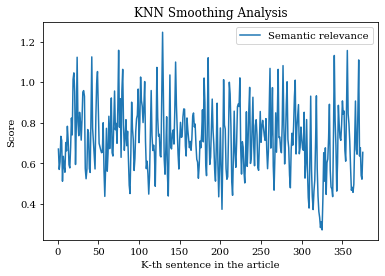

In [17]:
analyse_knn_smooth(articles[5365],titles[5365])

6. 获得end-to-end模型

将之前的步骤合起来，构建一个 get_summarization 函数。此函数的输入为文章的内容，标题与字数，输出为字符串。此字符串为和全文最相关的句子，并且该字符串会作为我们摘要生成的最终结果。

In [18]:
def get_summarization(text,title,score_fn,sum_len):
#     sum_len = len(text)/2
    sub_sentences = split_sentences_2(text)
    ranking_sentences = score_fn(text,title)
    selected_sen = set()
    current_sen = ''
    
    sub_sentences_clean=[]
    for sen in sub_sentences:
        sen=re.sub('\s+','',sen)
        sub_sentences_clean.append(sen)
        
    for sen, _ in ranking_sentences:
        if len(current_sen)<sum_len:
            current_sen += sen
            selected_sen.add(sen)
        else:
            break
                    
    summarized = []
    for sen in sub_sentences_clean:
        if sen in selected_sen:
            summarized.append(sen)
    return summarized

def get_summarization_by_sen_emb(text,title,max_len):
    sens = get_summarization(text,title,get_corr,max_len)
    return ''.join(sens)  

get_summarization_by_sen_emb(articles[6],titles[6],300)


近日，

当前市面上只有一款机子采用了骁龙 660 处理器，

考虑到夏普既然开始测试新机了，

在 5 月份的媒体沟通会上，




'虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于2013年退出中国市场，第一款夏普手机什么时候登陆中国呢？又会是怎么样的手机呢？一款型号为FS8016的夏普神秘新机悄然出现在GeekBench的跑分库上。从其中相关信息了解到，采用14纳米工艺，八个Kryo260核心设计，集成Adreno512GPU和X12LTE调制解调器。当前市面上只有一款机子采用了骁龙660处理器，骁龙660尽管并非旗舰芯片，但在多核新能上比去年骁龙820强，由于OPPO与高通签署了排他性协议，可以独占两三个月时间。考虑到夏普既然开始测试新机了，在5月份的媒体沟通会上，惠普罗忠生表示：我敢打赌，12个月之后，在座的各位手机都会换掉。'

In [55]:
get_summarization_by_sen_emb(articles[110],titles[110],300)

['在外国名著《麦田里的守望者》中，', '作者想要守护麦田里如自己内心一般纯真的孩子们。', '而驻村干部们，', '也在这个炎热的夏天里撸袖子上阵，', '真正做起了村民们的“麦田守望者”。', '三夏时节不等人。', '你看到了吗？', '不停翻涌起伏、仿若铺陈至天边的金黄麦浪中，', '那若隐若现的人影，', '是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者。', '在这个炎热的夏季，', '他们深入田间地头，', '帮助村民们收割小麦。', '扛起收麦机，', '麦田中的每个人都显得兴致勃勃，', '一天下来就近22亩小麦收割完毕。', '志愿者麦麦提亚森擦去满脸的汗水，', '高兴地告诉驻村队员：我们青年志愿者应该多做贡献，', '为村里的脱贫致富出把力。', '工作队带着我们为村里的老人服务，', '看到那些像我爷爷奶奶一样的老人赞许感谢的目光，', '我体会到了帮助他人的快乐。', '麦收时节我们在一起。', '6月中旬的和田墨玉，', '麦田金黄，', '静待收割。', '6月14日、15日两天，', '自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道，', '帮助村里29户有需要的村民进行小麦收割工作。', '田间地头，', '罕勒克艾日克村志愿队的红旗迎风飘扬，', '格外醒目。', '10余台割麦机一起轰鸣，', '男人们在用机器收割小麦的同时，', '几名妇女也加入到志愿队，', '构成了一道美丽的麦收风景。', '休息空闲，', '工作队员和村民们坐在树荫下、田埂上，', '互相问好、聊天。', '语言交流有困难，', '就用手势、动作比划着聊天，', '有趣地交流方式不时引来阵阵欢笑。', '大家在一同享受丰收和喜悦，', '也一同增进着彼此的情感和友谊。', '细看稻菽千重浪。', '6月15日，', '自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村，', '见到了自己的亲戚。', '现场处处都透出掩盖不住的喜悦，', '一声声亲切的“谢谢”、一个个结实的拥抱，', '都透露出浓浓的亲情。', '没坐一会儿，', '在嘘寒问暖中大家了解到在麦收的关键时刻，', '部分村民家中却存在收割难的问题。', '小麦成熟期短

E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


'你看到了吗？我体会到了帮助他人的快乐。麦收时节我们在一起。6月中旬的和田墨玉，静待收割。6月14日、15日两天，田间地头，罕勒克艾日克村志愿队的红旗迎风飘扬，格外醒目。男人们在用机器收割小麦的同时，几名妇女也加入到志愿队，构成了一道美丽的麦收风景。互相问好、聊天。语言交流有困难，就用手势、动作比划着聊天，有趣地交流方式不时引来阵阵欢笑。大家在一同享受丰收和喜悦，也一同增进着彼此的情感和友谊。细看稻菽千重浪。6月15日，自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村，收获的时间集中，在茂密的麦地里，干部们每人手持一把镰刀，一字排开，挽起衣袖、卷起裤腿，'

### 摘要生成测试

In [207]:
words_list=[len(str(x)) for x in articles]
words_list_sorted=sorted(words_list)
print("文章索引："+str(words_list.index(words_list_sorted[-123])))
print("文章标题："+str(titles[words_list.index(words_list_sorted[-123])]))
print(articles[words_list.index(words_list_sorted[-123])])

文章索引：5365
文章标题：中国炼油产能过剩超亿吨 油价迫近4元降回到十年前
5月，全国成品油掀起降价潮，“两桶油”旗下零售终端出现罕见降价，民营加油站被迫参战。《每日经济新闻》记者历时一周赴山东调查，采访数位成品油行业内人士后发现，此次降价潮的根本原因与国内炼油行业过剩、终端库存富余有着极大的关系。此外，批零价差偏大，又为成品油降价提供了充足空间。
对于广大车主来说，成品油降价无疑是个大利好，但这只是浮出海面的冰山一角，背后折射出的是我国地炼行业已经走入新的十字路口——销售端话语权降低，借收购加油站来打通中下游又面临着资金、审批等诸多门槛，出口又受到配额限制……对此，行业人士是如何规划未来的呢？每经记者试图通过这一组调查，来管窥成品油市场之一斑。
每经记者周程程每经编辑陈旭
当得知几公里外，距离最近的一家中石油加油站正在进行92号汽油的降价优惠后，汪文（化名）也下调了自己所经营的民营加油站的油品价格。
作为山东东营市的一家民营加油站老板，汪文此前认为，民营企业可以更加灵活快速地根据市场情况来调控加油站零售价，这一直是自身莫大的优势。
然而，当今年5月加油站大规模的“降价潮”袭来之时，汪文竟然成为被迫连续不断下调油品价格的一方，“一想到这些，我怎么也高兴不起来。”
多年以来，民营加油站为获取竞争优势，汽油、柴油等成品油价格基本一直是低于中石油、中石化等主营单位旗下加油站（行业中，常把中国石油、中国石化、中国海油等国营炼厂称之为“主营”，而与之相对的则是地方炼油厂，称之为“地炼”）。但在本轮“降价潮”之下，“两桶油”旗下加油站与民营加油站之间的成品油零售价差迅速缩小，着实令民营加油站担忧。
汪文对《每日经济新闻》记者表示，一般来说，以前民营加油站每升价格比“两桶油”加油站低一块钱的情况较多，有时两者价格甚至能相差两块多。“但这次我下调后，每升价格只比（距离最近的）中石化加油站的价格便宜5毛。”汪文叹了口气说道。
有河北地区民营加油站人士更为无奈，他对《每日经济新闻》记者表示，其所在的加油站和当地“两桶油”加油站每升只相差一角钱，已经降无可降了。
上轮低油价已是大约十年前
受制于国际油价不振，现阶段国内成品油价格已经承压。
截至国家发改委6月9日对成品油价格进行下调后，今年已呈现出“四涨五跌两搁浅”的调价格局，累积下调汽油价格355元/吨，柴油价格340元/吨。
在成

In [177]:
get_summarization_by_sen_emb(articles[5365],titles[5365],800)

'行业人士是如何规划未来的呢？每经记者试图通过这一组调查，来管窥成品油市场之一斑。作为山东东营市的一家民营加油站老板，汪文竟然成为被迫连续不断下调油品价格的一方，一想到这些，我怎么也高兴不起来。而与之相对的则是地方炼油厂，称之为“地炼”。汪文对《每日经济新闻》记者表示，每升价格只比中石化加油站的价格便宜5毛。汪文叹了口气说道。有河北地区民营加油站人士更为无奈，他对《每日经济新闻》记者表示，后来逐渐蔓延到河南、山西等内陆城市，幅度从每升1.2元~2元不等。5月下旬，当地许多中石油、中石化旗下加油站都打出了降价优惠信息。有中石化加油站门口以大号字提示“周二92#直降1.2元/升”。隆众资讯分析师李彦对于“两桶油”旗下加油站的降幅感到惊讶。民营加油站不得不相继跟进。差不多是十年前了，由此来看市场不可谓不疯狂。对于本轮降价潮产生的原因，此前也有传闻称，对此，中国石油大学教授、中国油气产业发展研究中心主任董秀成撰文表示，事实上这和本次价格战之间的关联性不大。董秀成表示，一个有力的例证便是，它们为何没有卷入降价潮？以京津沪为例，刘培培表示，在刘培培看来，最主要的原因就是，所以也就没有了降价的必要。具体以北京为例，隆众监测数据显示，刘培培表示，经调查发现，而二环以内的金融街、积水潭等附近的加油站，挂牌价丝毫未动。并没有降价促销的必要。刘培培说，有人欢喜有人忧。另一边，以国五92#汽油价格为例，他评价说。对于1.9元到2.3元范围的理论利润范围，而据加油站方面反映，提货价是在3.9元/升，销售价是4.1元/升，数据显示，刘磊表示，属于薄利多销。已经没法做了。现在地炼之间的竞争压力也非常大，这家不做，总有别家会做。想要参与竞争，金云在文章中表示，当欧佩克国家面临国际低油价时，经常祭出减产保价的“大招”，但这一玩法在国内地炼行业显然并未提上日程。张林表示，如果生产机器停下来，上述管理层人士也肯定了这一说法，他对《每日经济新闻》记者表示，'

In [198]:
words_list=[len(str(x)) for x in articles]
words_list_sorted=sorted(words_list)
print("文章索引："+str(words_list.index(words_list_sorted[-134])))
print("文章标题："+str(titles[words_list.index(words_list_sorted[-134])]))
print(articles[words_list.index(words_list_sorted[-134])])

文章索引：5632
文章标题：国产食盐“添加剂”堪比砒霜？央视深度揭秘
原标题：央视辟谣：国产食盐“添加剂”堪比砒霜 纯属胡说八道！
　　（央视财经《消费主张》）近日，网上流传一些关于质疑国产食盐安全的文章。网传文章提到，“国产食盐里面有种可怕的添加剂——亚铁氰化钾”在生活中，烹饪食物的时候，食用盐遇高温有可能会使亚铁氰化钾分解成氰化钾这种剧毒物质，在10秒钟内能使人丧失意志，几分钟内可以毒死一人。
网传文章中还提到，“奥运会、世博会特供食盐及出口食盐均不含亚铁氰化钾”。
　　这一传言在网上迅速传播。很多网友面对传言真假难辨，忧心忡忡。国产食盐究竟安全吗？国产食盐中真的含有亚铁氰化钾吗？这种物质会对人体产生危害吗？
　　为了查证传言的真实性，我们记者首先来到了北京的一家大型连锁超市，在调味品区的货架上，记者发现，这里一共有12种不同种类的食盐。其中国产食盐有9种，除了竹盐和湖盐这两种盐里面没有添加“亚铁氰化钾”外，其他7种食盐，包括低钠岩盐、深井岩盐和海藻岩盐里都标明含有亚铁氰化钾。
看来网传文章提到的，国产食盐含有亚铁氰化钾这一说法还是真实的。
　　亚铁氰化钾是一种合法的食品添加剂。
　　那么食盐中抗结剂亚铁氰化钾真的像传言说的那样是一种慢性毒药吗？含有亚铁氰化钾的国产食盐对人体会不会造成伤害呢？为此，记者找到了中华预防医学会健康传播分会常务委员钟凯。钟凯在食品安全方面有着多年的研究和经验。他告诉记者，亚铁氰化钾是一种合法的食品添加剂，国产食盐中的亚铁氰化钾长期食用并不会给人体带来伤害。
　　中华预防医学会健康传播分会常务委员钟凯：其实最简单的判别标准，它是一种合法的食品添加剂，那么在批准它使用之前要经过很多很多科学研究和数据支持，包括了大家关心的，比如说急性毒性、慢性毒性，有没有致畸、致癌等等各种各样的毒性，全部都筛查一遍之后，没有问题才会批准它使用，所以不会有这种慢性危害，我们在批准一种添加剂的时候，已经考虑到了大家想到的长期大量吃会不会有问题。
　　钟凯介绍说，亚铁氰化钾是低毒物质，按照中国国家标准的规定，食盐中的抗结计以亚铁氰根计含量不得超过每公斤10毫克。
　　钟凯中华预防医学会健康传播分会常务委员：根据世界卫生组织和国际粮农组织专家委员会的评估数据，亚铁氰化钾要造成人健康上负面效应，至少每天，成年人可能要摄入1.5毫克，那么如果按照我们国家标准规定这个

In [231]:
get_summarization_by_sen_emb(articles[5632],titles[5632],1100)

'网上流传一些关于质疑国产食盐安全的文章。在10秒钟内能使人丧失意志，几分钟内可以毒死一人。这一传言在网上迅速传播。很多网友面对传言真假难辨，为了查证传言的真实性，在调味品区的货架上，为此，钟凯在食品安全方面有着多年的研究和经验。那么在批准它使用之前要经过很多很多科学研究和数据支持，亚铁氰化钾要造成人健康上负面效应，就已经非常非常咸了。亚铁氰化钾在高温下可以分解产生氰化钾这种剧毒物质吗？它的结合力非常强，所以它俩不是一回事，食用盐遇高温有可能会使亚铁氰化钾分解成氰化钾，倒不是说不行，你大概需要400度的温度，我们在家里做饭、做菜的时候，所以你在家里是不可能让它分解，中华预防医学会健康传播分会常务委员钟凯：首先亚铁氰化钾在烹饪过程当中是不会分解出氰化物的，退一万步说，记者来到了中盐国本盐业有限公司。中盐国本盐业有限公司研发质检部部长崔志强：亚铁氰化钾，原料盐和成品盐各取5克之后，三个样本取样之后，又加入了50毫升蒸馏水定容。中盐国本盐业有限公司研发质检部化验员张玲玲：然后很明显，中盐国本盐业有限公司研发质检部化验员张玲玲：这是刚才所测的原料无碘精制盐分析报告，原料盐在经过再次清洁之后，网传文章中提到，奥运会、世博会、亚运会、大运会拒绝转基因食品，以防短期来华的外国友人误食亚铁氰化钾。这种说法可信吗？中国盐业总公司的盐生产量现在不仅在亚洲是第一位，中国盐业总公司盐品营销中心副主任崔静：我们中盐北京公司还有中盐上海公司，是我们两个位于重要直辖市的两个企业，然后还有中央国家机关的一些食盐的保障供应任务，比方说这个2008年的奥运会，还有上海的世博会，包括我们最近关注的这个一带一路的峰会，都是我们这两个企业进行供应，我们还特意求证了浙江省盐业集团公司，因为前不久举世瞩目的G20峰会是在杭州举行，浙江省盐业集团作为食盐的单位，中盐金坛盐化有限责任公司品质部副部长谢兴胜：我们这个产品就是供应到国内和供应到国外是同一个质量，同一个标准，这些国家对这个亚铁氰化钾都从来没有提出过异议。谢兴胜告诉记者，在出口的26个国家当中，这是为什么呢？中盐金坛盐化有限责任公司品质部副部长谢兴胜：日本例外，主要是由于日本，因为是岛国，随后，记者又来到了位于北京朝阳区的一家进口超市。来自意大利、法国、美国、澳大利亚和日本5个国家，真实情况是这样吗？记者在亚马逊美国官网上真的找到了网传文章中提到的抗结剂为

In [239]:
words_list=[len(str(x)) for x in articles]
words_list_sorted=sorted(words_list)
print("文章索引："+str(words_list.index(words_list_sorted[-5011])))
print("文章标题："+str(titles[words_list.index(words_list_sorted[-5011])]))
print(articles[words_list.index(words_list_sorted[-5011])])

文章索引：1878
文章标题：大商所:活跃黄大豆2号合约 促进大豆压榨产业稳健发展
　　5月31日，调整后的黄大豆2号新合约在大商所上市交易。黄大豆2号新合约的上市将对相关产业带来哪些影响？合约和规则设计的基本原则和亮点有哪些？交易所将怎样有效防范黄大豆2号合约的市场风险？值黄大豆2号新合约上市之际，记者就市场关心的上述问题采访了大商所相关负责人。
　　多举措活跃合约
　　中国证券报：为什么调整黄大豆2号合约和规则，新合约主要在哪些方面进行了修改和优化？
　　大商所相关负责人：近年来，我国压榨行业发展迅速，压榨大豆需求不断攀升，2016年进口规模已达8391万吨。而以压榨大豆为标的物的黄大豆2号合约却长期不活跃，与日益增长的现货市场规模不匹配。黄大豆2号期货交易不活跃主要有两个原因：一是按照国家转基因政策的要求，进口大豆现货市场实行全流程封闭管理，期货交割不便利；二是压榨用大豆的现货市场已出现较大变化，进口大豆成为主要压榨原料，巴西已超过美国成为主要进口来源国，需要调整现行合约及规则设计。
　　经过三年多的调研论证，2016年11月，国家质检总局从国家战略的角度出发，对进口大豆参与期货交割的相关政策进行重大调整，为进口大豆参与期货交割提供了便利措施。在积极参与政策论证的同时，大商所根据现货市场变化，对黄大豆2号合约规则进行调整，主要体现在合约月份、交割质量标准、交割制度、标准仓单制度、交割区域、手续费标准及风控制度等方面，进一步贴近现货市场实际情况，降低投资者交易成本，提升客户参与期货交割的积极性。
　　中国证券报：在黄大豆2号新合约的设计中，交易所基于哪些考量因素？
　　大商所相关负责人：合约条款及交割质量标准的调整，是市场非常关注的内容，也是影响期货功能发挥的关键因素。大商所经过充分的市场调研，使新合约的设计贴合现货市场实际情况，充分满足产业风险管理需求，同时适当降低投资者参与交易和交割成本，促进黄大豆2号服务产业功能的有效发挥。
　　在黄大豆2号新合约的交割质量标准设计上，考虑近年进口大豆来源格局发生较大变化，巴西已超过美国成为主要进口来源国，大商所将巴西大豆和美国大豆均纳入标准品范围，突出体现销区导向型的市场特点，并考虑进口大豆在库储存的实际情况，针对破碎粒、总损及热损指标，设置了不同的入出库标准。
　　在合约条款设计上，新合约月份调整为全年连续月份，反映大

In [242]:
get_summarization_by_sen_emb(articles[1878],titles[1878],700)

'值黄大豆2号新合约上市之际，记者就市场关心的上述问题采访了大商所相关负责人。多举措活跃合约。中国证券报：为什么调整黄大豆2号合约和规则，新合约主要在哪些方面进行了修改和优化？大商所相关负责人：近年来，我国压榨行业发展迅速，压榨大豆需求不断攀升，需要调整现行合约及规则设计。经过三年多的调研论证，2016年11月，国家质检总局从国家战略的角度出发，为进口大豆参与期货交割提供了便利措施。在积极参与政策论证的同时，中国证券报：在黄大豆2号新合约的设计中，交易所基于哪些考量因素？大商所相关负责人：合约条款及交割质量标准的调整，是市场非常关注的内容，也是影响期货功能发挥的关键因素。在黄大豆2号新合约的交割质量标准设计上，大商所将巴西大豆和美国大豆均纳入标准品范围，突出体现销区导向型的市场特点，并考虑进口大豆在库储存的实际情况，针对破碎粒、总损及热损指标，设置了不同的入出库标准。在合约条款设计上，反映大豆全年连续进口的特点。同时，将交易手续费由2元/手调整为1元/手，进一步便于客户积极参与黄大豆2号的期货交易。有何积极意义。中国证券报：黄大豆2号新合约的上市对相关产业发展有何积极意义？大商所相关负责人：黄大豆2号新合约规则的实施，将在维护国家粮食安全、促进行业健康发展、掌握大豆国际定价权等方面，发挥重要的作用。一是有利于制定国际通行的“中国标准”。二是有利于形成公开透明的“中国价格”。黄大豆2号以进口大豆为主要标的，以人民币计价和结算，反映了中国市场价格，逐步成为全球大豆销区的基准价格。三是有利于贯彻实施国家粮食安全战略。四是有利于中国企业套期保值。仅能规避美国大豆市场价格变化风险，明显提升风险管理效果。'